### Load tensorflow

In [1]:
import tensorflow as tf

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 



In [3]:
#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()

### Collect Data

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
data = pd.read_csv('prices.csv')

### Check all columns in the dataset

In [7]:
data.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


### Drop columns `date` and  `symbol`

In [9]:
data.drop(['date','symbol'],axis=1,inplace=True)

In [10]:
data.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


### Consider only first 1000 rows in the dataset for building feature set and target set

In [11]:
data1000=data.iloc[:1000]

In [12]:
data1000.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


In [13]:
X=data1000.drop('close',axis=1)

In [14]:
y=data1000['close']

### Divide the data into train and test sets

In [15]:

from scipy.stats import zscore
from sklearn.model_selection import train_test_split


In [50]:
X=X.apply(zscore)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                        random_state = 1)

In [52]:
init = tf.global_variables_initializer()

In [54]:
n_input = 800  # input layer (28x28 pixels)
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128 

## Building the graph in tensorflow

1.Define input data placeholders

In [55]:
X1 = tf.placeholder(tf.float32, [None, 4], "X_in") 
y1 = tf.placeholder(tf.float32, [None],"y_in") 

2.Define Weights and Bias

In [56]:

# Set model weights and bias 
#W = tf.Variable(np.random.randn(), name="weight") 
#W = tf.Variable(tf.random_normal([4, 1]), name="w")
W = tf.Variable(np.random.rand(4,1), name="w",dtype=tf.float64)
b = tf.Variable(np.random.randn(), name="b",dtype=tf.float64)   
#W=tf.Variable(tf.truncated_normal([4, 1], stddev=0.1))
#b = tf.Variable(np.random.randn(), name="bias") 

In [57]:
W

<tf.Variable 'w_4:0' shape=(4, 1) dtype=float64_ref>

In [58]:
W = tf.Variable(tf.random_normal([4, 1]), name="w")
b = tf.Variable(np.random.randn(), name="b")   

In [59]:
b

<tf.Variable 'b_5:0' shape=() dtype=float32_ref>

In [60]:
init = tf.global_variables_initializer()

In [62]:
n_samples=x_train.shape[0]

In [64]:
linear_model = tf.add(tf.matmul(X1,W),b)

## cost = tf.reduce_sum(tf.square(linear_model - y1)) / (2*n_samples)
cost = tf.reduce_mean(tf.square(tf.subtract(y1, linear_model))) /n_samples 

In [65]:
# Model Parameters 
learning_rate = 0.01
training_epochs = 2000
display_step = 200

In [66]:
cost = tf.reduce_mean(tf.square(tf.subtract(y1, linear_model))) 

In [67]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

3.Prediction

In [ ]:
#done above

4.Loss (Cost) Function [Mean square error]

In [68]:
#sess.run(W)
#y_train

In [69]:
#sess.run(linear_model, feed_dict={X1: x_train, y1: y_train}) 

5.GradientDescent Optimizer to minimize Loss [GradientDescentOptimizer]

200 3568.5435 [[ 0.9710834]
 [-1.9813625]
 [ 1.0141311]
 [ 0.0548731]] 65.43455
400 3567.2134 [[ 0.96976095]
 [-1.9817475 ]
 [ 1.0122203 ]
 [ 0.00392726]] 66.56713
600 3567.2131 [[ 9.6934223e-01]
 [-1.9811661e+00]
 [ 1.0116440e+00]
 [ 1.2760005e-03]] 66.58711
800 3567.2134 [[ 9.6905333e-01]
 [-1.9804522e+00]
 [ 1.0112038e+00]
 [ 1.1856825e-03]] 66.58732
1000 3567.2134 [[ 9.6876723e-01]
 [-1.9797369e+00]
 [ 1.0107741e+00]
 [ 1.1829180e-03]] 66.58732
1200 3567.2131 [[ 9.6848112e-01]
 [-1.9790217e+00]
 [ 1.0103450e+00]
 [ 1.1824634e-03]] 66.58732
1400 3567.2134 [[ 9.6819502e-01]
 [-1.9783064e+00]
 [ 1.0099158e+00]
 [ 1.1820325e-03]] 66.58732
1600 3567.2134 [[ 9.6790892e-01]
 [-1.9775912e+00]
 [ 1.0094867e+00]
 [ 1.1815542e-03]] 66.58732
1800 3567.2126 [[ 9.6762282e-01]
 [-1.9768759e+00]
 [ 1.0090575e+00]
 [ 1.1811424e-03]] 66.58732
2000 3567.2131 [[ 9.6733671e-01]
 [-1.9761606e+00]
 [ 1.0086284e+00]
 [ 1.1807369e-03]] 66.58732
Optimization Finished!
Final training cost: 3567.2131 W: [[ 9.

ValueError: shapes (4,1) and (700,4) not aligned: 1 (dim 1) != 700 (dim 0)

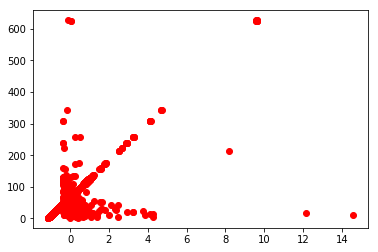

In [75]:
# Launch the graph 
with tf.Session() as sess: 
	# Load initialized variables in current session 
	sess.run(init) 

	# Fit all training data 
	for epoch in range(training_epochs): 

		# perform gradient descent step
		#sess.run(linear_model, feed_dict={X1: x_train, y1: y_train})         
		#op=sess.run([optimizer,cost], feed_dict={X1: x_train, y1: y_train}) 
		#print(y_train)
		sess.run(optimizer, feed_dict={X1: x_train, y1: y_train}) 
		#print(sess.run(W))
		# Display logs per epoch step 
		if (epoch+1) % display_step == 0: 
			c = sess.run(cost, feed_dict={X1: x_train, y1: y_train}) 
			#print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}". 
				#format(epoch+1, c, sess.run(W), sess.run(b)))
			print(epoch+1,c,sess.run(W),sess.run(b))
			
	# Print final parameter values 
	print("Optimization Finished!") 
# 	training_cost = sess.run(cost, feed_dict={X1: x_train, y1: y_train}) 
	print("Final training cost:", c, "W:", sess.run(W), "b:", 
		sess.run(b), '\n') 

## Execute the Graph for 100 epochs and observe the loss

In [0]:
#done above

### Get the shapes and values of W and b

Hint: Use sess.run(W) to get W.

In [0]:
#done above

### Find the Absolute mean square loss difference between training and testing loss.

In [0]:
#done above

### Linear Classification using Keras

### Building the simple Neural Network in Keras with one neuron in the dense hidden layer.
#### Use Mean square error as loss function and sgd as optimizer

### Execute the model

### Classification using Keras 

In [50]:
import pandas as pd 

### Load the given Iris data using pandas (Iris.csv)

In [91]:
irisDF=pd.read_csv('iris.csv')

In [92]:
irisDF

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Splitting the data into feature set and target set

In [306]:
xir=irisDF.drop(['Id','Species'],axis=1)

In [307]:
yir=irisDF['Species']

### Target set has different categories. So, Label encode them. And convert into one-hot vectors using get_dummies in pandas.

In [319]:
yir=pd.get_dummies(yir)

In [320]:
yir.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [321]:
from scipy.stats import zscore

In [322]:
#xir=xir.apply(zscore)

### Divide the dataset into Training and test (70:30)

In [323]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(xir, yir, test_size=0.3, 
                                                        random_state = 1)

### Model
Build the model with following layers: <br>
1. First dense layer with 10 neurons with input shape 4 (according to the feature set) <br>
2. Second Dense layer with 8 neurons <br>
3. Output layer with 3 neurons with softmax activation (output layer, 3 neurons as we have 3 classes) <br>
4. Use SGD and categorical_crossentropy loss 

In [335]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import SGD 
from keras.optimizers import Adam
from keras import utils 
import numpy as np 

In [336]:
xir.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [344]:
batch_size = 1000
n_inputs = 784 
n_classes = 10 
n_epochs = 2000

In [345]:
x_train1.shape[0]

105

In [346]:
# build a sequential model 

model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 10, activation ='relu', input_shape =( 4,))) # add dropout layer for preventing overfitting 
#model.add( Dropout( 0.1)) 
model.add( Dense( units = 8, activation ='relu')) 
#model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = 3, activation ='softmax')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = Adam(), metrics =['accuracy']) 

# train the model 
model.fit( x_train1, y_train1, batch_size = batch_size, epochs = n_epochs) 

# evaluate the model and print the accuracy score 

scores = model.evaluate( x_test1, y_test1) 

print('\ n loss:', scores[ 0]) 

print('\ n accuracy:', scores[ 1])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_71 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_72 (Dense)             (None, 3)                 27        
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
105/105 [==============================] - 3s 29ms/step - loss: 1.0985 - acc: 0.3333
Epoch 2/2000
105/105 [==============================] - 0s 58us/step - loss: 1.0985 - acc: 0.3524
Epoch 3/2000
105/105 [==============================] - 0s 48us/step - loss: 1.0984 - acc: 0.3524
Epoch 4/2000
105/105 [==============================] - 0s 45us/step - loss: 1.0983 - acc: 0.3714
Epoch 5/2000
105

Epoch 77/2000
105/105 [==============================] - 0s 68us/step - loss: 1.0051 - acc: 0.6571
Epoch 78/2000
105/105 [==============================] - 0s 62us/step - loss: 1.0037 - acc: 0.6571
Epoch 79/2000
105/105 [==============================] - 0s 59us/step - loss: 1.0022 - acc: 0.6571
Epoch 80/2000
105/105 [==============================] - 0s 64us/step - loss: 1.0007 - acc: 0.6571
Epoch 81/2000
105/105 [==============================] - 0s 54us/step - loss: 0.9992 - acc: 0.6571
Epoch 82/2000
105/105 [==============================] - 0s 50us/step - loss: 0.9977 - acc: 0.6571
Epoch 83/2000
105/105 [==============================] - 0s 52us/step - loss: 0.9962 - acc: 0.6571
Epoch 84/2000
105/105 [==============================] - 0s 54us/step - loss: 0.9947 - acc: 0.6571
Epoch 85/2000
105/105 [==============================] - 0s 60us/step - loss: 0.9931 - acc: 0.6571
Epoch 86/2000
105/105 [==============================] - 0s 39us/step - loss: 0.9916 - acc: 0.6571
Epoch 87/2

Epoch 160/2000
105/105 [==============================] - 0s 60us/step - loss: 0.8521 - acc: 0.6952
Epoch 161/2000
105/105 [==============================] - 0s 50us/step - loss: 0.8501 - acc: 0.6952
Epoch 162/2000
105/105 [==============================] - 0s 49us/step - loss: 0.8481 - acc: 0.6952
Epoch 163/2000
105/105 [==============================] - 0s 59us/step - loss: 0.8461 - acc: 0.6952
Epoch 164/2000
105/105 [==============================] - 0s 45us/step - loss: 0.8441 - acc: 0.6952
Epoch 165/2000
105/105 [==============================] - 0s 50us/step - loss: 0.8421 - acc: 0.6952
Epoch 166/2000
105/105 [==============================] - 0s 46us/step - loss: 0.8401 - acc: 0.6952
Epoch 167/2000
105/105 [==============================] - 0s 63us/step - loss: 0.8381 - acc: 0.6952
Epoch 168/2000
105/105 [==============================] - 0s 61us/step - loss: 0.8361 - acc: 0.6952
Epoch 169/2000
105/105 [==============================] - 0s 48us/step - loss: 0.8342 - acc: 0.6952


Epoch 242/2000
105/105 [==============================] - 0s 52us/step - loss: 0.7098 - acc: 0.7524
Epoch 243/2000
105/105 [==============================] - 0s 47us/step - loss: 0.7083 - acc: 0.7524
Epoch 244/2000
105/105 [==============================] - 0s 66us/step - loss: 0.7069 - acc: 0.7619
Epoch 245/2000
105/105 [==============================] - 0s 45us/step - loss: 0.7055 - acc: 0.7714
Epoch 246/2000
105/105 [==============================] - 0s 54us/step - loss: 0.7041 - acc: 0.7714
Epoch 247/2000
105/105 [==============================] - 0s 66us/step - loss: 0.7027 - acc: 0.7714
Epoch 248/2000
105/105 [==============================] - 0s 65us/step - loss: 0.7013 - acc: 0.7714
Epoch 249/2000
105/105 [==============================] - 0s 46us/step - loss: 0.7000 - acc: 0.7714
Epoch 250/2000
105/105 [==============================] - 0s 55us/step - loss: 0.6986 - acc: 0.7714
Epoch 251/2000
105/105 [==============================] - 0s 47us/step - loss: 0.6973 - acc: 0.7714


Epoch 324/2000
105/105 [==============================] - 0s 50us/step - loss: 0.6167 - acc: 0.9238
Epoch 325/2000
105/105 [==============================] - 0s 54us/step - loss: 0.6158 - acc: 0.9238
Epoch 326/2000
105/105 [==============================] - 0s 57us/step - loss: 0.6149 - acc: 0.9238
Epoch 327/2000
105/105 [==============================] - 0s 71us/step - loss: 0.6139 - acc: 0.9238
Epoch 328/2000
105/105 [==============================] - 0s 56us/step - loss: 0.6130 - acc: 0.9238
Epoch 329/2000
105/105 [==============================] - 0s 49us/step - loss: 0.6121 - acc: 0.9238
Epoch 330/2000
105/105 [==============================] - 0s 52us/step - loss: 0.6112 - acc: 0.9238
Epoch 331/2000
105/105 [==============================] - 0s 51us/step - loss: 0.6103 - acc: 0.9333
Epoch 332/2000
105/105 [==============================] - 0s 55us/step - loss: 0.6094 - acc: 0.9333
Epoch 333/2000
105/105 [==============================] - 0s 54us/step - loss: 0.6085 - acc: 0.9333


Epoch 406/2000
105/105 [==============================] - 0s 63us/step - loss: 0.5497 - acc: 0.9619
Epoch 407/2000
105/105 [==============================] - 0s 50us/step - loss: 0.5490 - acc: 0.9619
Epoch 408/2000
105/105 [==============================] - 0s 50us/step - loss: 0.5482 - acc: 0.9619
Epoch 409/2000
105/105 [==============================] - 0s 52us/step - loss: 0.5475 - acc: 0.9619
Epoch 410/2000
105/105 [==============================] - 0s 76us/step - loss: 0.5467 - acc: 0.9619
Epoch 411/2000
105/105 [==============================] - 0s 45us/step - loss: 0.5460 - acc: 0.9619
Epoch 412/2000
105/105 [==============================] - 0s 48us/step - loss: 0.5452 - acc: 0.9619
Epoch 413/2000
105/105 [==============================] - 0s 55us/step - loss: 0.5445 - acc: 0.9619
Epoch 414/2000
105/105 [==============================] - 0s 45us/step - loss: 0.5438 - acc: 0.9619
Epoch 415/2000
105/105 [==============================] - 0s 42us/step - loss: 0.5430 - acc: 0.9619


Epoch 488/2000
105/105 [==============================] - 0s 58us/step - loss: 0.4911 - acc: 0.9714
Epoch 489/2000
105/105 [==============================] - 0s 47us/step - loss: 0.4904 - acc: 0.9714
Epoch 490/2000
105/105 [==============================] - 0s 47us/step - loss: 0.4898 - acc: 0.9714
Epoch 491/2000
105/105 [==============================] - 0s 68us/step - loss: 0.4891 - acc: 0.9714
Epoch 492/2000
105/105 [==============================] - 0s 44us/step - loss: 0.4884 - acc: 0.9714
Epoch 493/2000
105/105 [==============================] - 0s 45us/step - loss: 0.4877 - acc: 0.9714
Epoch 494/2000
105/105 [==============================] - 0s 43us/step - loss: 0.4870 - acc: 0.9714
Epoch 495/2000
105/105 [==============================] - 0s 46us/step - loss: 0.4863 - acc: 0.9714
Epoch 496/2000
105/105 [==============================] - 0s 50us/step - loss: 0.4856 - acc: 0.9714
Epoch 497/2000
105/105 [==============================] - 0s 48us/step - loss: 0.4850 - acc: 0.9714


Epoch 570/2000
105/105 [==============================] - 0s 62us/step - loss: 0.4364 - acc: 0.9619
Epoch 571/2000
105/105 [==============================] - 0s 54us/step - loss: 0.4358 - acc: 0.9619
Epoch 572/2000
105/105 [==============================] - 0s 51us/step - loss: 0.4351 - acc: 0.9619
Epoch 573/2000
105/105 [==============================] - 0s 52us/step - loss: 0.4345 - acc: 0.9619
Epoch 574/2000
105/105 [==============================] - 0s 52us/step - loss: 0.4338 - acc: 0.9619
Epoch 575/2000
105/105 [==============================] - 0s 50us/step - loss: 0.4332 - acc: 0.9619
Epoch 576/2000
105/105 [==============================] - 0s 43us/step - loss: 0.4326 - acc: 0.9619
Epoch 577/2000
105/105 [==============================] - 0s 51us/step - loss: 0.4319 - acc: 0.9619
Epoch 578/2000
105/105 [==============================] - 0s 54us/step - loss: 0.4313 - acc: 0.9619
Epoch 579/2000
105/105 [==============================] - 0s 45us/step - loss: 0.4306 - acc: 0.9619


Epoch 652/2000
105/105 [==============================] - 0s 50us/step - loss: 0.3853 - acc: 0.9714
Epoch 653/2000
105/105 [==============================] - 0s 46us/step - loss: 0.3847 - acc: 0.9714
Epoch 654/2000
105/105 [==============================] - 0s 48us/step - loss: 0.3841 - acc: 0.9714
Epoch 655/2000
105/105 [==============================] - 0s 62us/step - loss: 0.3835 - acc: 0.9714
Epoch 656/2000
105/105 [==============================] - 0s 70us/step - loss: 0.3829 - acc: 0.9714
Epoch 657/2000
105/105 [==============================] - 0s 51us/step - loss: 0.3823 - acc: 0.9714
Epoch 658/2000
105/105 [==============================] - 0s 64us/step - loss: 0.3817 - acc: 0.9714
Epoch 659/2000
105/105 [==============================] - 0s 54us/step - loss: 0.3811 - acc: 0.9714
Epoch 660/2000
105/105 [==============================] - 0s 50us/step - loss: 0.3805 - acc: 0.9714
Epoch 661/2000
105/105 [==============================] - 0s 53us/step - loss: 0.3800 - acc: 0.9714


Epoch 734/2000
105/105 [==============================] - 0s 43us/step - loss: 0.3382 - acc: 0.9714
Epoch 735/2000
105/105 [==============================] - 0s 51us/step - loss: 0.3377 - acc: 0.9714
Epoch 736/2000
105/105 [==============================] - 0s 50us/step - loss: 0.3372 - acc: 0.9714
Epoch 737/2000
105/105 [==============================] - 0s 58us/step - loss: 0.3366 - acc: 0.9714
Epoch 738/2000
105/105 [==============================] - 0s 47us/step - loss: 0.3361 - acc: 0.9714
Epoch 739/2000
105/105 [==============================] - 0s 45us/step - loss: 0.3355 - acc: 0.9714
Epoch 740/2000
105/105 [==============================] - 0s 38us/step - loss: 0.3350 - acc: 0.9714
Epoch 741/2000
105/105 [==============================] - 0s 47us/step - loss: 0.3344 - acc: 0.9714
Epoch 742/2000
105/105 [==============================] - 0s 47us/step - loss: 0.3339 - acc: 0.9714
Epoch 743/2000
105/105 [==============================] - 0s 65us/step - loss: 0.3334 - acc: 0.9714


Epoch 816/2000
105/105 [==============================] - 0s 45us/step - loss: 0.2961 - acc: 0.9714
Epoch 817/2000
105/105 [==============================] - 0s 58us/step - loss: 0.2956 - acc: 0.9714
Epoch 818/2000
105/105 [==============================] - 0s 57us/step - loss: 0.2952 - acc: 0.9714
Epoch 819/2000
105/105 [==============================] - 0s 43us/step - loss: 0.2947 - acc: 0.9714
Epoch 820/2000
105/105 [==============================] - 0s 48us/step - loss: 0.2942 - acc: 0.9714
Epoch 821/2000
105/105 [==============================] - 0s 52us/step - loss: 0.2937 - acc: 0.9714
Epoch 822/2000
105/105 [==============================] - 0s 42us/step - loss: 0.2933 - acc: 0.9714
Epoch 823/2000
105/105 [==============================] - 0s 57us/step - loss: 0.2928 - acc: 0.9714
Epoch 824/2000
105/105 [==============================] - 0s 52us/step - loss: 0.2923 - acc: 0.9714
Epoch 825/2000
105/105 [==============================] - 0s 44us/step - loss: 0.2918 - acc: 0.9714


Epoch 898/2000
105/105 [==============================] - 0s 46us/step - loss: 0.2601 - acc: 0.9714
Epoch 899/2000
105/105 [==============================] - 0s 46us/step - loss: 0.2597 - acc: 0.9714
Epoch 900/2000
105/105 [==============================] - 0s 50us/step - loss: 0.2593 - acc: 0.9714
Epoch 901/2000
105/105 [==============================] - 0s 56us/step - loss: 0.2589 - acc: 0.9714
Epoch 902/2000
105/105 [==============================] - 0s 51us/step - loss: 0.2585 - acc: 0.9714
Epoch 903/2000
105/105 [==============================] - 0s 44us/step - loss: 0.2582 - acc: 0.9714
Epoch 904/2000
105/105 [==============================] - 0s 49us/step - loss: 0.2578 - acc: 0.9714
Epoch 905/2000
105/105 [==============================] - 0s 47us/step - loss: 0.2574 - acc: 0.9714
Epoch 906/2000
105/105 [==============================] - 0s 61us/step - loss: 0.2570 - acc: 0.9714
Epoch 907/2000
105/105 [==============================] - 0s 76us/step - loss: 0.2566 - acc: 0.9714


Epoch 980/2000
105/105 [==============================] - 0s 62us/step - loss: 0.2304 - acc: 0.9714
Epoch 981/2000
105/105 [==============================] - 0s 56us/step - loss: 0.2300 - acc: 0.9714
Epoch 982/2000
105/105 [==============================] - 0s 47us/step - loss: 0.2297 - acc: 0.9714
Epoch 983/2000
105/105 [==============================] - 0s 54us/step - loss: 0.2294 - acc: 0.9714
Epoch 984/2000
105/105 [==============================] - 0s 52us/step - loss: 0.2290 - acc: 0.9714
Epoch 985/2000
105/105 [==============================] - 0s 42us/step - loss: 0.2287 - acc: 0.9714
Epoch 986/2000
105/105 [==============================] - 0s 51us/step - loss: 0.2284 - acc: 0.9714
Epoch 987/2000
105/105 [==============================] - 0s 54us/step - loss: 0.2281 - acc: 0.9714
Epoch 988/2000
105/105 [==============================] - 0s 57us/step - loss: 0.2277 - acc: 0.9714
Epoch 989/2000
105/105 [==============================] - 0s 50us/step - loss: 0.2274 - acc: 0.9714


Epoch 1062/2000
105/105 [==============================] - 0s 53us/step - loss: 0.2059 - acc: 0.9714
Epoch 1063/2000
105/105 [==============================] - 0s 48us/step - loss: 0.2056 - acc: 0.9714
Epoch 1064/2000
105/105 [==============================] - 0s 70us/step - loss: 0.2054 - acc: 0.9714
Epoch 1065/2000
105/105 [==============================] - 0s 37us/step - loss: 0.2051 - acc: 0.9714
Epoch 1066/2000
105/105 [==============================] - 0s 45us/step - loss: 0.2049 - acc: 0.9714
Epoch 1067/2000
105/105 [==============================] - 0s 53us/step - loss: 0.2046 - acc: 0.9714
Epoch 1068/2000
105/105 [==============================] - 0s 45us/step - loss: 0.2043 - acc: 0.9714
Epoch 1069/2000
105/105 [==============================] - 0s 41us/step - loss: 0.2041 - acc: 0.9714
Epoch 1070/2000
105/105 [==============================] - 0s 66us/step - loss: 0.2038 - acc: 0.9714
Epoch 1071/2000
105/105 [==============================] - 0s 48us/step - loss: 0.2035 - ac

105/105 [==============================] - 0s 50us/step - loss: 0.1864 - acc: 0.9714
Epoch 1144/2000
105/105 [==============================] - 0s 44us/step - loss: 0.1862 - acc: 0.9714
Epoch 1145/2000
105/105 [==============================] - 0s 46us/step - loss: 0.1860 - acc: 0.9714
Epoch 1146/2000
105/105 [==============================] - 0s 53us/step - loss: 0.1858 - acc: 0.9714
Epoch 1147/2000
105/105 [==============================] - 0s 57us/step - loss: 0.1856 - acc: 0.9714
Epoch 1148/2000
105/105 [==============================] - 0s 61us/step - loss: 0.1853 - acc: 0.9714
Epoch 1149/2000
105/105 [==============================] - 0s 53us/step - loss: 0.1851 - acc: 0.9714
Epoch 1150/2000
105/105 [==============================] - 0s 43us/step - loss: 0.1849 - acc: 0.9714
Epoch 1151/2000
105/105 [==============================] - 0s 66us/step - loss: 0.1847 - acc: 0.9714
Epoch 1152/2000
105/105 [==============================] - 0s 42us/step - loss: 0.1845 - acc: 0.9714
Epoch 

Epoch 1225/2000
105/105 [==============================] - 0s 73us/step - loss: 0.1703 - acc: 0.9714
Epoch 1226/2000
105/105 [==============================] - 0s 58us/step - loss: 0.1701 - acc: 0.9714
Epoch 1227/2000
105/105 [==============================] - 0s 50us/step - loss: 0.1700 - acc: 0.9714
Epoch 1228/2000
105/105 [==============================] - 0s 43us/step - loss: 0.1698 - acc: 0.9714
Epoch 1229/2000
105/105 [==============================] - 0s 44us/step - loss: 0.1696 - acc: 0.9714
Epoch 1230/2000
105/105 [==============================] - 0s 49us/step - loss: 0.1694 - acc: 0.9714
Epoch 1231/2000
105/105 [==============================] - 0s 48us/step - loss: 0.1693 - acc: 0.9714
Epoch 1232/2000
105/105 [==============================] - 0s 57us/step - loss: 0.1691 - acc: 0.9714
Epoch 1233/2000
105/105 [==============================] - 0s 70us/step - loss: 0.1689 - acc: 0.9714
Epoch 1234/2000
105/105 [==============================] - 0s 57us/step - loss: 0.1687 - ac

105/105 [==============================] - 0s 48us/step - loss: 0.1574 - acc: 0.9714
Epoch 1307/2000
105/105 [==============================] - 0s 62us/step - loss: 0.1573 - acc: 0.9714
Epoch 1308/2000
105/105 [==============================] - 0s 54us/step - loss: 0.1571 - acc: 0.9714
Epoch 1309/2000
105/105 [==============================] - 0s 44us/step - loss: 0.1570 - acc: 0.9714
Epoch 1310/2000
105/105 [==============================] - 0s 48us/step - loss: 0.1568 - acc: 0.9714
Epoch 1311/2000
105/105 [==============================] - 0s 51us/step - loss: 0.1567 - acc: 0.9714
Epoch 1312/2000
105/105 [==============================] - 0s 58us/step - loss: 0.1565 - acc: 0.9714
Epoch 1313/2000
105/105 [==============================] - 0s 42us/step - loss: 0.1564 - acc: 0.9714
Epoch 1314/2000
105/105 [==============================] - 0s 55us/step - loss: 0.1563 - acc: 0.9714
Epoch 1315/2000
105/105 [==============================] - 0s 47us/step - loss: 0.1561 - acc: 0.9714
Epoch 

Epoch 1388/2000
105/105 [==============================] - 0s 47us/step - loss: 0.1467 - acc: 0.9714
Epoch 1389/2000
105/105 [==============================] - 0s 59us/step - loss: 0.1466 - acc: 0.9714
Epoch 1390/2000
105/105 [==============================] - 0s 77us/step - loss: 0.1465 - acc: 0.9714
Epoch 1391/2000
105/105 [==============================] - 0s 61us/step - loss: 0.1464 - acc: 0.9714
Epoch 1392/2000
105/105 [==============================] - 0s 76us/step - loss: 0.1463 - acc: 0.9714
Epoch 1393/2000
105/105 [==============================] - 0s 75us/step - loss: 0.1461 - acc: 0.9714
Epoch 1394/2000
105/105 [==============================] - 0s 53us/step - loss: 0.1460 - acc: 0.9714
Epoch 1395/2000
105/105 [==============================] - 0s 63us/step - loss: 0.1459 - acc: 0.9714
Epoch 1396/2000
105/105 [==============================] - 0s 56us/step - loss: 0.1458 - acc: 0.9714
Epoch 1397/2000
105/105 [==============================] - 0s 66us/step - loss: 0.1457 - ac

105/105 [==============================] - 0s 62us/step - loss: 0.1380 - acc: 0.9714
Epoch 1470/2000
105/105 [==============================] - 0s 69us/step - loss: 0.1379 - acc: 0.9714
Epoch 1471/2000
105/105 [==============================] - 0s 59us/step - loss: 0.1378 - acc: 0.9714
Epoch 1472/2000
105/105 [==============================] - 0s 55us/step - loss: 0.1377 - acc: 0.9714
Epoch 1473/2000
105/105 [==============================] - 0s 66us/step - loss: 0.1376 - acc: 0.9714
Epoch 1474/2000
105/105 [==============================] - 0s 58us/step - loss: 0.1375 - acc: 0.9714
Epoch 1475/2000
105/105 [==============================] - 0s 67us/step - loss: 0.1374 - acc: 0.9714
Epoch 1476/2000
105/105 [==============================] - 0s 57us/step - loss: 0.1373 - acc: 0.9714
Epoch 1477/2000
105/105 [==============================] - 0s 52us/step - loss: 0.1372 - acc: 0.9714
Epoch 1478/2000
105/105 [==============================] - 0s 46us/step - loss: 0.1371 - acc: 0.9714
Epoch 

Epoch 1551/2000
105/105 [==============================] - 0s 46us/step - loss: 0.1305 - acc: 0.9714
Epoch 1552/2000
105/105 [==============================] - 0s 101us/step - loss: 0.1304 - acc: 0.9714
Epoch 1553/2000
105/105 [==============================] - 0s 46us/step - loss: 0.1303 - acc: 0.9714
Epoch 1554/2000
105/105 [==============================] - 0s 50us/step - loss: 0.1303 - acc: 0.9714
Epoch 1555/2000
105/105 [==============================] - 0s 49us/step - loss: 0.1302 - acc: 0.9714
Epoch 1556/2000
105/105 [==============================] - 0s 47us/step - loss: 0.1301 - acc: 0.9714
Epoch 1557/2000
105/105 [==============================] - 0s 47us/step - loss: 0.1300 - acc: 0.9714
Epoch 1558/2000
105/105 [==============================] - 0s 46us/step - loss: 0.1299 - acc: 0.9714
Epoch 1559/2000
105/105 [==============================] - 0s 41us/step - loss: 0.1299 - acc: 0.9714
Epoch 1560/2000
105/105 [==============================] - 0s 42us/step - loss: 0.1298 - a

105/105 [==============================] - 0s 58us/step - loss: 0.1243 - acc: 0.9714
Epoch 1633/2000
105/105 [==============================] - 0s 48us/step - loss: 0.1242 - acc: 0.9714
Epoch 1634/2000
105/105 [==============================] - 0s 48us/step - loss: 0.1242 - acc: 0.9714
Epoch 1635/2000
105/105 [==============================] - 0s 60us/step - loss: 0.1241 - acc: 0.9714
Epoch 1636/2000
105/105 [==============================] - 0s 60us/step - loss: 0.1240 - acc: 0.9714
Epoch 1637/2000
105/105 [==============================] - 0s 45us/step - loss: 0.1239 - acc: 0.9714
Epoch 1638/2000
105/105 [==============================] - 0s 55us/step - loss: 0.1239 - acc: 0.9714
Epoch 1639/2000
105/105 [==============================] - 0s 45us/step - loss: 0.1238 - acc: 0.9714
Epoch 1640/2000
105/105 [==============================] - 0s 55us/step - loss: 0.1237 - acc: 0.9714
Epoch 1641/2000
105/105 [==============================] - 0s 67us/step - loss: 0.1237 - acc: 0.9714
Epoch 

Epoch 1714/2000
105/105 [==============================] - 0s 52us/step - loss: 0.1189 - acc: 0.9714
Epoch 1715/2000
105/105 [==============================] - 0s 59us/step - loss: 0.1189 - acc: 0.9714
Epoch 1716/2000
105/105 [==============================] - 0s 46us/step - loss: 0.1188 - acc: 0.9714
Epoch 1717/2000
105/105 [==============================] - 0s 76us/step - loss: 0.1188 - acc: 0.9714
Epoch 1718/2000
105/105 [==============================] - 0s 44us/step - loss: 0.1187 - acc: 0.9714
Epoch 1719/2000
105/105 [==============================] - 0s 60us/step - loss: 0.1186 - acc: 0.9714
Epoch 1720/2000
105/105 [==============================] - 0s 56us/step - loss: 0.1186 - acc: 0.9714
Epoch 1721/2000
105/105 [==============================] - 0s 52us/step - loss: 0.1185 - acc: 0.9714
Epoch 1722/2000
105/105 [==============================] - 0s 74us/step - loss: 0.1185 - acc: 0.9714
Epoch 1723/2000
105/105 [==============================] - 0s 57us/step - loss: 0.1184 - ac

105/105 [==============================] - 0s 49us/step - loss: 0.1144 - acc: 0.9714
Epoch 1796/2000
105/105 [==============================] - 0s 55us/step - loss: 0.1143 - acc: 0.9714
Epoch 1797/2000
105/105 [==============================] - 0s 75us/step - loss: 0.1143 - acc: 0.9714
Epoch 1798/2000
105/105 [==============================] - 0s 53us/step - loss: 0.1142 - acc: 0.9714
Epoch 1799/2000
105/105 [==============================] - 0s 53us/step - loss: 0.1142 - acc: 0.9714
Epoch 1800/2000
105/105 [==============================] - 0s 55us/step - loss: 0.1141 - acc: 0.9714
Epoch 1801/2000
105/105 [==============================] - 0s 47us/step - loss: 0.1141 - acc: 0.9714
Epoch 1802/2000
105/105 [==============================] - 0s 52us/step - loss: 0.1140 - acc: 0.9714
Epoch 1803/2000
105/105 [==============================] - 0s 54us/step - loss: 0.1140 - acc: 0.9714
Epoch 1804/2000
105/105 [==============================] - 0s 56us/step - loss: 0.1139 - acc: 0.9714
Epoch 

Epoch 1877/2000
105/105 [==============================] - 0s 61us/step - loss: 0.1104 - acc: 0.9714
Epoch 1878/2000
105/105 [==============================] - 0s 51us/step - loss: 0.1103 - acc: 0.9714
Epoch 1879/2000
105/105 [==============================] - 0s 56us/step - loss: 0.1103 - acc: 0.9714
Epoch 1880/2000
105/105 [==============================] - 0s 50us/step - loss: 0.1102 - acc: 0.9714
Epoch 1881/2000
105/105 [==============================] - 0s 63us/step - loss: 0.1102 - acc: 0.9714
Epoch 1882/2000
105/105 [==============================] - 0s 51us/step - loss: 0.1102 - acc: 0.9714
Epoch 1883/2000
105/105 [==============================] - 0s 94us/step - loss: 0.1101 - acc: 0.9714
Epoch 1884/2000
105/105 [==============================] - 0s 58us/step - loss: 0.1101 - acc: 0.9714
Epoch 1885/2000
105/105 [==============================] - 0s 51us/step - loss: 0.1100 - acc: 0.9714
Epoch 1886/2000
105/105 [==============================] - 0s 61us/step - loss: 0.1100 - ac

Epoch 1959/2000
105/105 [==============================] - 0s 70us/step - loss: 0.1069 - acc: 0.9714
Epoch 1960/2000
105/105 [==============================] - 0s 58us/step - loss: 0.1069 - acc: 0.9714
Epoch 1961/2000
105/105 [==============================] - 0s 75us/step - loss: 0.1068 - acc: 0.9714
Epoch 1962/2000
105/105 [==============================] - 0s 55us/step - loss: 0.1068 - acc: 0.9714
Epoch 1963/2000
105/105 [==============================] - 0s 65us/step - loss: 0.1067 - acc: 0.9714
Epoch 1964/2000
105/105 [==============================] - 0s 54us/step - loss: 0.1067 - acc: 0.9714
Epoch 1965/2000
105/105 [==============================] - 0s 73us/step - loss: 0.1067 - acc: 0.9714
Epoch 1966/2000
105/105 [==============================] - 0s 119us/step - loss: 0.1066 - acc: 0.9714
Epoch 1967/2000
105/105 [==============================] - 0s 44us/step - loss: 0.1066 - acc: 0.9714
Epoch 1968/2000
105/105 [==============================] - 0s 59us/step - loss: 0.1065 - a

### Fitting the model and predicting 

### Report Accuracy of the predicted values